**Gestione Energetica ed Automazione negli Edifici (GEAE) A.A. 2024/2025**

*Tutto il materiale didattico messo a disposizione degli studenti (compresi script, markdown, presentazioni, video e Virtual Classroom) è da utilizzarsi esclusivamente per scopi didattici e nell’ambito del corso di “gestione energetica e automazione negli edifici”. È vietata ogni forma di utilizzo diverso, redistribuzione e pubblicazione on line. Per ogni eventuale dubbio o richiesta contattare il titolare del corso prof. Alfonso Capozzoli a alfonso.capozzoli@polito.it*

# Introduzione all'utilizzo della libreria Pandas
## Importing Pandas

In [1]:
import pandas as pd

## Creating a DataFrame
Create a DataFrame from a dictionary of lists:

In [2]:
data = {
    'Temperature (°C)': [20, 25, 30, 35, 40],
    'Pressure (bar)': [1.0, 1.2, 1.4, 1.6, 1.8],
    'Flow Rate (m³/h)': [100, 150, 200, 250, 300]
}

df = pd.DataFrame(data)
print("Initial DataFrame:")
print(df)

Initial DataFrame:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0                20             1.0               100
1                25             1.2               150
2                30             1.4               200
3                35             1.6               250
4                40             1.8               300


## Exploring the Data

In [3]:
print("\nDataFrame Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature (°C)  5 non-null      int64  
 1   Pressure (bar)    5 non-null      float64
 2   Flow Rate (m³/h)  5 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 252.0 bytes
None

Descriptive Statistics:
       Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
count          5.000000        5.000000          5.000000
mean          30.000000        1.400000        200.000000
std            7.905694        0.316228         79.056942
min           20.000000        1.000000        100.000000
25%           25.000000        1.200000        150.000000
50%           30.000000        1.400000        200.000000
75%           35.000000        1.600000        250.000000
max           40.000000        1.800000        300.000000


## Selection and Indexing
Selecting a column

In [4]:
temperatures = df['Temperature (°C)']
print("\nTemperature Column:")
print(temperatures)


Temperature Column:
0    20
1    25
2    30
3    35
4    40
Name: Temperature (°C), dtype: int64


Selecting multiple columns

In [5]:
temperature_and_pressure = df[['Temperature (°C)', 'Pressure (bar)']]
print("\nTemperature and Pressure Columns:")
print(temperature_and_pressure)


Temperature and Pressure Columns:
   Temperature (°C)  Pressure (bar)
0                20             1.0
1                25             1.2
2                30             1.4
3                35             1.6
4                40             1.8


Selecting rows

In [6]:
first_row = df.loc[0]
print("\nFirst Row of the DataFrame:")
print(first_row)


First Row of the DataFrame:
Temperature (°C)     20.0
Pressure (bar)        1.0
Flow Rate (m³/h)    100.0
Name: 0, dtype: float64


In [7]:
first_three_rows = df.loc[0:2]
print("\nFirst Three Rows of the DataFrame:")
print(first_three_rows)


First Three Rows of the DataFrame:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0                20             1.0               100
1                25             1.2               150
2                30             1.4               200


In [8]:
last_row = df.loc[df.index[-1]]
print("\nLast Row of the DataFrame:")
print(last_row)


Last Row of the DataFrame:
Temperature (°C)     40.0
Pressure (bar)        1.8
Flow Rate (m³/h)    300.0
Name: 4, dtype: float64


Selecting a specific value

In [9]:
specific_value = df.loc[2, 'Pressure (bar)']
print("\nSpecific value at row 2, column 'Pressure (bar)':", specific_value)


Specific value at row 2, column 'Pressure (bar)': 1.4


## Filtering Data
Filtering rows where temperature is greater than 30°C

In [10]:
df_high_temp = df[df['Temperature (°C)'] > 30]
print("\nData with temperature greater than 30°C:")
print(df_high_temp)


Data with temperature greater than 30°C:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
3                35             1.6               250
4                40             1.8               300


## Adding and Removing Columns

In [11]:
mass = 1000  # kg
specific_heat = 4.18  # kJ/(kg·K)
initial_temperature = 15  # °C
df['Thermal Energy (kJ)'] = mass * specific_heat * (df['Temperature (°C)'] - initial_temperature)
print("\nDataFrame with Calculated Thermal Energy:")
print(df)


DataFrame with Calculated Thermal Energy:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)  Thermal Energy (kJ)
0                20             1.0               100              20900.0
1                25             1.2               150              41800.0
2                30             1.4               200              62700.0
3                35             1.6               250              83600.0
4                40             1.8               300             104500.0


## Grouping and aggregation
Calculating the average flow rate for each pressure

In [12]:
average_flow_rate = df.groupby('Pressure (bar)')['Flow Rate (m³/h)'].mean()
print("\nAverage Flow Rate by Pressure:")
print(average_flow_rate)


Average Flow Rate by Pressure:
Pressure (bar)
1.0    100.0
1.2    150.0
1.4    200.0
1.6    250.0
1.8    300.0
Name: Flow Rate (m³/h), dtype: float64


## Merging DataFrames

In [13]:
data2 = {
    'Temperature (°C)': [25, 30, 35],
    'Efficiency (%)': [80, 82, 85]
}

df_efficiency = pd.DataFrame(data2)

# Merging DataFrames on the 'Temperature (°C)' column
df_merged = pd.merge(df, df_efficiency, on='Temperature (°C)', how='left')
print("\nMerged DataFrame with Efficiency:")
print(df_merged)


Merged DataFrame with Efficiency:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)  Thermal Energy (kJ)  \
0                20             1.0               100              20900.0   
1                25             1.2               150              41800.0   
2                30             1.4               200              62700.0   
3                35             1.6               250              83600.0   
4                40             1.8               300             104500.0   

   Efficiency (%)  
0             NaN  
1            80.0  
2            82.0  
3            85.0  
4             NaN  


## Handling Missing Data

In [14]:
data3 = {
    'Temperature (°C)': [20, 25, None, 35, 40],
    'Pressure (bar)': [1.0, 1.2, 1.4, 1.6, None],
    'Flow Rate (m³/h)': [100, 150, 200, None, 300]
}

df_missing = pd.DataFrame(data3)
print("\nDataFrame with Missing Data:")
print(df_missing)


DataFrame with Missing Data:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0              20.0             1.0             100.0
1              25.0             1.2             150.0
2               NaN             1.4             200.0
3              35.0             1.6               NaN
4              40.0             NaN             300.0


Dropping rows with missing values

In [15]:
df_cleaned = df_missing.dropna()
print("\nDataFrame after Dropping Rows with Missing Values:")

print(df_cleaned)


DataFrame after Dropping Rows with Missing Values:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0              20.0             1.0             100.0
1              25.0             1.2             150.0


Filling missing values with a specific value

In [16]:
df_filled = df_missing.fillna(0)
print("\nDataFrame after Filling Missing Values with 0:")
print(df_filled)


DataFrame after Filling Missing Values with 0:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0              20.0             1.0             100.0
1              25.0             1.2             150.0
2               0.0             1.4             200.0
3              35.0             1.6               0.0
4              40.0             0.0             300.0


Using na interpolation to fill missing values

In [17]:
df_interpolated = df_missing.interpolate()
print("\nDataFrame after Interpolating Missing Values:")
print(df_interpolated)


DataFrame after Interpolating Missing Values:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0              20.0             1.0             100.0
1              25.0             1.2             150.0
2              30.0             1.4             200.0
3              35.0             1.6             250.0
4              40.0             1.6             300.0


# Introduction to data visualization with matplotlib

In [18]:
import matplotlib.pyplot as plt

Plotting Temperature vs. Thermal Energy

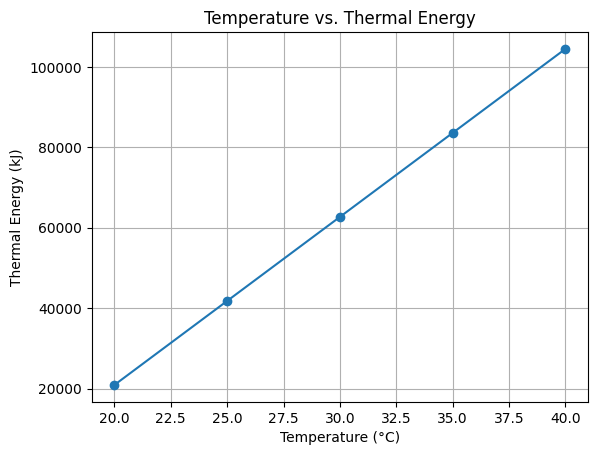

In [19]:
plt.plot(df['Temperature (°C)'], df['Thermal Energy (kJ)'], marker='o')
plt.title('Temperature vs. Thermal Energy')
plt.xlabel('Temperature (°C)')
plt.ylabel('Thermal Energy (kJ)')
plt.grid(True)
plt.show()

Bar chart of Efficiency

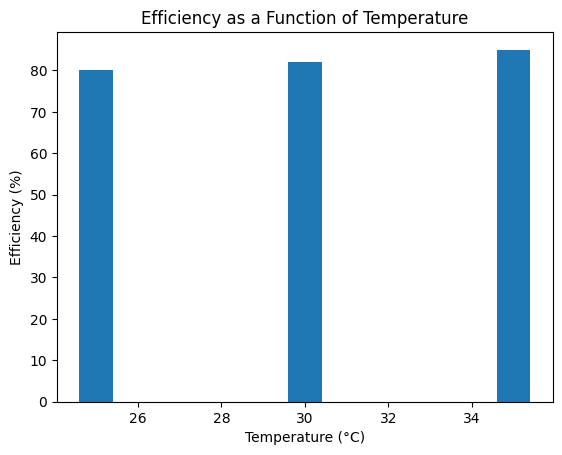

In [20]:
df_merged.dropna(inplace=True)  # Remove rows with NaN values
plt.bar(df_merged['Temperature (°C)'], df_merged['Efficiency (%)'])
plt.title('Efficiency as a Function of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Efficiency (%)')
plt.show()